# Multiclass classification

We've just solved a binary classification problem. What about a **`multiclass classification task`**?

### Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe overfitting during the model's convergence

# 1. Create the data


The **`make_blobs`** function [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) enables to draw : 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

There is also the `random_state` argument that allows to draw the data deterministically, in order to reproduce the same data. Two people who choose the same random_state will have the same data.

❓ **Question** ❓ Based on the documentation, generate data with : 
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

Select a `random_state` equal to 1.

Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y`

In [8]:
# YOUR CODE HERE
# YOUR CODE HERE
from sklearn.datasets import make_blobs
import pandas as pd
X,y=make_blobs(n_samples=1200,centers=7,cluster_std=8,n_features=8,random_state=0)


In [12]:
X.shape

(1200, 8)

In [10]:
y.shape

(1200,)

In [30]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], x3=X[:,2], x4=X[:,3],
                       x5=X[:,4], x6=X[:,5], x7=X[:,6], x8=X[:,7],
                       label=y))
df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,label
0,-5.471227,7.032014,10.451966,12.464046,7.829852,5.762523,-19.210505,4.487730,3
1,2.658293,-8.059455,-10.696501,-0.654104,3.174358,-6.757187,16.653322,4.996013,4
2,-9.705755,16.490332,-21.699464,10.201334,-6.067970,-6.549598,-15.329078,0.331301,3
3,-0.049666,2.129615,3.792705,1.523353,9.709460,4.089408,-13.098223,-2.345005,0
4,-0.841623,0.845807,-7.753516,-6.760889,2.158716,-1.828835,0.161192,0.866779,4


KeyError: ignored

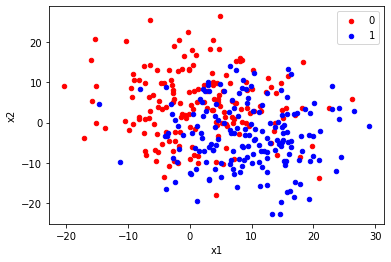

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    plt.show()

plot_moons(X, y)

❓ **Question** ❓ Using `matplotlib`, scatterplot two (arbitrary) dimensions of the input data together. Each dot should be colored with the category it belongs to.

In [ ]:
# YOUR CODE HERE

❓ **Question** ❓ Repeat the operation on other dimensions, to visualy that the data are not easily separable

In [ ]:
# YOUR CODE HERE

For the moment, the target `y` is a list of integers,  corresponding to the category of the input data.
It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

💡 To transform `y` to categories, use **`to_categorical`** function from Keras.

*[Remark]* In a sense, *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding the target.


❓ **Question** ❓ First print `y`, then apply the *`to_categorical`* to *`y`* and store the *`categorized version of y`* into **`y_cat`**.

In [39]:
# YOUR CODE HERE
from tensorflow.keras.utils import to_categorical

categorized_version_of_y=to_categorical(y,num_classes=None)
categorized_version_of_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

❓ **Question** ❓ Split the dataset $X$ and $y_{cat}$  into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [42]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, categorized_version_of_y, test_size=0.3)
X_train

array([[ -3.94546403,   2.51070886,  -5.02043221, ...,   4.38972786,
         -6.06401956, -10.71677274],
       [ -9.18760991,  12.05896099,  -7.32971972, ...,  -3.06175623,
         14.13528044,  19.67957835],
       [ -9.33249664,   1.44951484,   0.70228479, ...,  -8.71507963,
          8.41838723,   6.91482797],
       ...,
       [ 10.37055635,  -2.45814838, -14.7835531 , ...,   0.38976681,
         15.9101969 ,   6.73451379],
       [  8.38853119,  -5.79062545,  14.45080055, ...,  13.1088041 ,
        -12.49790459,  -2.98699687],
       [-15.62873925,   5.79800732, -12.76766336, ...,  10.5652042 ,
         -1.36708409,   7.5517428 ]])

In deep learning, the data should always be standard-scaled, so as to lay _approximately_ in [-1, 1]. (We will see later why).

❓ **Question** ❓ Fit a sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the train set and transform both your train set and test set.

In [58]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler


In [60]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)

❓ **Question** ❓ Complete the following function to initialize a model that has: 
- a first layer with 50 neurons, the `relu` activation and an appropriate input dimension
- a output layer designed for a multiclassification task which outputs probabilities for each class

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def initialize_model():
    ### Model architecture
    model=Sequential()
    model.add(layers.Dense(50,activation="relu",input_dim=8))
    model.add(layers.Dense(7,activation="sigmoid"))

    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model 
### Note here that the loss is different! This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ How many parameters (a.k.a. weights) are there in the model?

How many parameters would a Deep Logistic Regression have with the same data?

In [62]:
# YOUR CODE HEREHow many parameters?


In [63]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics = "accuracy"
)

model.fit(X_train,y_train,batch_size=16,epochs=50)

Epoch 1/50
53/53 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.2393
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.4071
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.5583
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.6167
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.6750
Epoch 6/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.6857
Epoch 7/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.6940
Epoch 8/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.6940
Epoch 9/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2184 - accuracy: 0.7000
Epoch 10/50
53/53 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.7060
Epoch 11/50
53/53 [

❓ **Question** ❓ Fit your model on the train data with 50 epochs and plot the history

In [64]:
# YOUR CODE HERE
model.evaluate(scaler.transform(X_test), y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.6333


[0.2393350601196289, 0.6333333253860474]

❓ **Question** ❓ Evaluate your model on the test set and print the accuracy

In [14]:
# YOUR CODE HERE
accuracy_baseline= 0.14285714285714285 

❓ **Question** ❓ Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable.

In [15]:
# YOUR CODE HERE

In [17]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/03-Multiclass-classification
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_baseline.py::TestBaseline::test_accuracy PASSED               [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master


❗ **Remark** ❗ Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stopping it so soon? Let's rerun the model (with the initialization first) with 1000 epochs and plot the history

In [69]:
# YOUR CODE HERE
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, 
                    batch_size=16,
                    verbose=0)

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
  

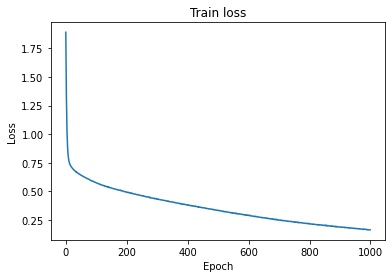

In [70]:
plot_history(history)

❓ **Question** ❓ 
- What can you say about the new loss? 
- Evaluate once again your model on the test set and print the accuracy

In [71]:
# YOUR CODE HERE
model.evaluate(scaler.transform(X_test), y_test)

12/12 [==============================] - 0s 2ms/step - loss: 2.5994 - accuracy: 0.5722


[2.5993618965148926, 0.5722222328186035]

❗ **Remark** ❗ On one hand, the loss (computed on the train set) seems smaller than with 50 epochs. On the other hand, the accuracy on the test set got worse than before... 

❓ **Question** ❓ How is this phenomenon called? 

> YOUR ANSWER HERE

❗ **Remark** ❗ The overfitting occurs at some point during the iteration of the gradient descent, once the accuracy starts getting worse on the test set...

⚠️ Therefore, we should:
* either `choose a reasonable number of epochs to avoid overfitting` 
* or create what is called an `Early Stopping` criterion (cf. `Optimizers, Loss, Fitting` lecture tomorrow)

Let's visually check when the test loss increases again in practice. 

😱 Yes, by using the test set, there is a massive data-leakage..., we should create a validation set for that in reality... again, cf. tomorrow's lecture!

❓ **Question** ❓ Run the following command and plot the history

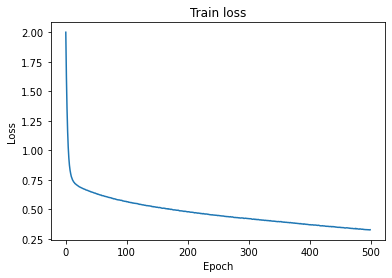

In [72]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)
plot_history(history)

❓ **Question** ❓ Plot the values of the loss and accuracy on the train set (in blue) and on the test set (in orange). What can you comment on that?

In [73]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

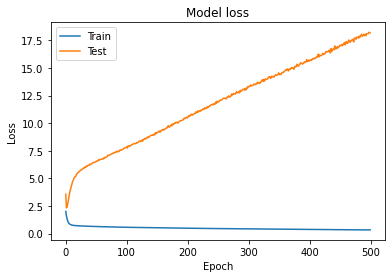

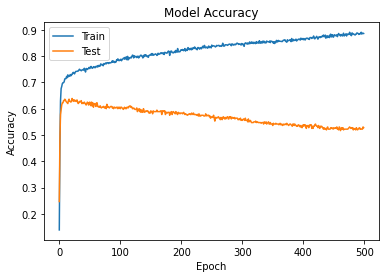

In [74]:
# YOUR CODE HERE
plot_loss_accuracy(history)

❓ **Question** ❓ Reproduce similar results by defining a more complex architecture that includes : 

- a first layer with 25 neurons 
- a second layer with 15 neurons
- a third layer with 10 neurons
- a final layer that outputs probability for each class



In [ ]:
def initialize_model_2():
    pass  # YOUR CODE HERE


❗ **Remark** ❗ 
- We clearly see that an overfitting can happend during the training. More in our next lecture
- The model overfits as the number of parameters is very large (compare the number of weights with a logistic regression on the same data...)

**🏁 Congratulations! Commit and push your notebook**